In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import log

plt.rcParams["figure.figsize"] = (20,10)


In [8]:
#read log.txt which is comma separated
df = pd.read_csv('log.txt', sep=';')
#only take the "product" , "timestamp" and "profit_and_loss" columns
df = df[["product", "timestamp", "profit_and_loss"]]
#remove the products that are not PINA_COLADAS or COCONUTS
df = df[df["product"].isin(["PINA_COLADAS", "COCONUTS"])]
#make timestamp the index
df = df.set_index("timestamp")

In [9]:
df.head()

,product,profit_and_loss
timestamp,,
0,COCONUTS,0.0
0,PINA_COLADAS,0.0
100,COCONUTS,0.0
100,PINA_COLADAS,0.0
200,PINA_COLADAS,0.0


In [10]:
# split it into two dataframes, one for PINA_COLADAS and one for COCONUTS
df_pina = df[df["product"] == "PINA_COLADAS"]
df_coco = df[df["product"] == "COCONUTS"]

In [11]:
df_pina.head()

,product,profit_and_loss
timestamp,,
0,PINA_COLADAS,0.0
100,PINA_COLADAS,0.0
200,PINA_COLADAS,0.0
300,PINA_COLADAS,0.0
400,PINA_COLADAS,0.0


In [12]:
#make a new dataframe with the same timestamps and a column called pnl with 0s
total = pd.DataFrame(index=df_pina.index, data={"pnl": 0})
#make the pnl the sum of the profit and loss of the PINA_COLADAS and COCONUTS
total["pnl"] = df_coco["profit_and_loss"] + df_pina["profit_and_loss"]

In [13]:
total.tail()

,pnl
timestamp,
99500,8803.5
99600,8183.5
99700,8390.0
99800,8318.5
99900,8322.5


<AxesSubplot:xlabel='timestamp'>

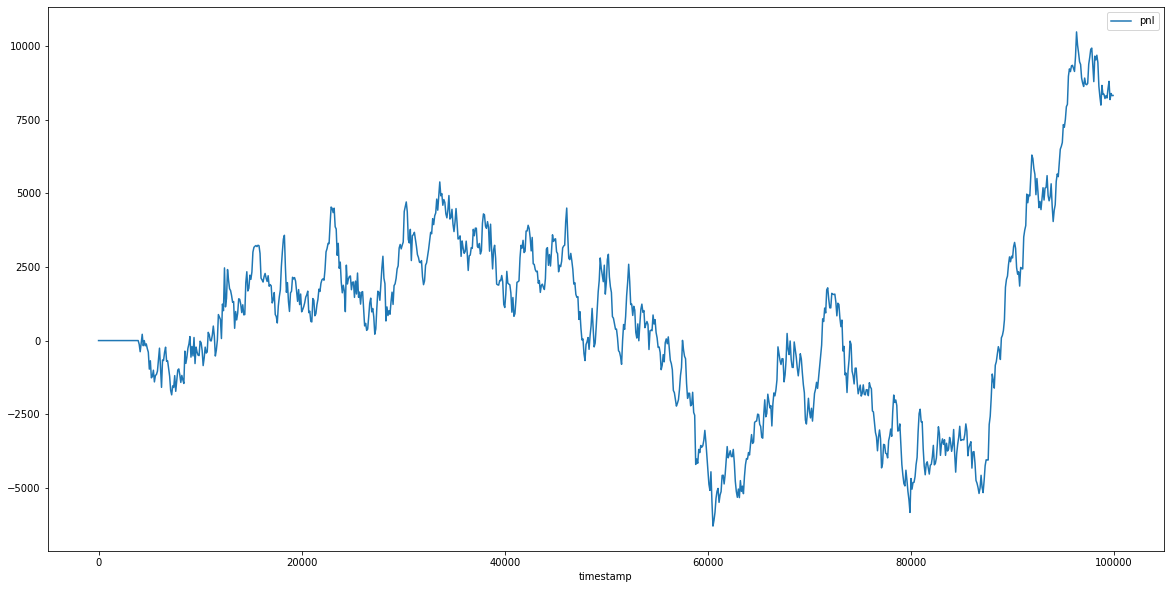

In [14]:
#plot total pnl
total.plot()